<a href="https://colab.research.google.com/github/nurfnick/Mathematical_Musings/blob/main/CrapsSimulator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Craps Simulator for One Shooter

In [1]:
import random

random.randint(1,6)

5

Above code rolls a dice once.

In [2]:
def Roll2Dice():
  return [random.randint(1,6),random.randint(1,6)]

In [3]:
Roll2Dice()

[4, 6]

This rolls two dies

In [36]:
from numpy import histogram
listy = []

for i in range(10000):
  listy.append(sum(Roll2Dice()))

histogram(listy,bins = 11)

(array([ 287,  537,  845, 1149, 1351, 1625, 1437, 1120,  785,  575,  289]),
 array([ 2.        ,  2.90909091,  3.81818182,  4.72727273,  5.63636364,
         6.54545455,  7.45454545,  8.36363636,  9.27272727, 10.18181818,
        11.09090909, 12.        ]))

In [5]:
sums = range(2,13,1)
newlist =[]
for i in sums:
  newlist.append(0)

for i in listy:
  for j in sums:
    if i == j:
      newlist[i-2] +=1

newlist

[27, 62, 87, 121, 147, 163, 125, 91, 91, 61, 25]

Above I have checked that the outcomes are random but as expected.  Both codes do the same thing


In [6]:
def ComeOutRoll(TwoDice):
  s = sum(TwoDice)
  if (s == 2)|(s == 3)|(s==12):
    return 'Craps'
  elif (s == 7)|(s == 11):
    return 'comeAgain'
  else:
    return s #return the point

ComeOutRoll([4,4])

8

In [7]:
ComeOutRoll([6,6])

'Craps'

The `ComeOutRoll` is the first roll in the craps game.  There are three options **Craps** (2,3,12) **Natural** (7,11) (designated here as 'comeAgain' since you will get another come out roll.  Any othe value will set the point, the function just returns that number.

In [8]:
def SetPointRoll(TwoDice,point):
  s = sum(TwoDice)
  if s == 7:
    return 'SevenOut'
  elif s == point:
    return 'comeAgain'
  else:
    return point

SetPointRoll([5,4],9)

'comeAgain'

In [9]:
SetPointRoll([3,4],4)

'SevenOut'

In [10]:
SetPointRoll([3,1],5)

5

After the point has been set, you will roll over and over again until you **comeAgain** by hitting the same point or **SevenOut** by rolling a 7.  The function returns the point if neither of those happen.

In [11]:
def PlayCraps():
  x = ComeOutRoll(Roll2Dice())
  rollCounter = 1
  while (x != 'Craps')&(x != 'SevenOut'):
    if x == 'comeAgain':
      rollCounter += 1
      x = ComeOutRoll(Roll2Dice())
    else:
      point = x
      rollCounter += 1
      x = SetPointRoll(Roll2Dice(),point)
  return rollCounter


In [12]:
PlayCraps()

1

`PlayCraps` will play the game returning the number of rolls until you **Crap** or **SevenOut**.  Let's compute some statistics about it.

In [38]:

list1 = []
for i in range(100000):
  list1.append(PlayCraps())
sum(list1)/len(list1)


6.70834

(array([6.849e+03, 2.013e+03, 8.150e+02, 2.060e+02, 7.400e+01, 3.000e+01,
        9.000e+00, 3.000e+00, 0.000e+00, 1.000e+00]),
 array([ 1. ,  7.4, 13.8, 20.2, 26.6, 33. , 39.4, 45.8, 52.2, 58.6, 65. ]),
 <a list of 10 Patch objects>)

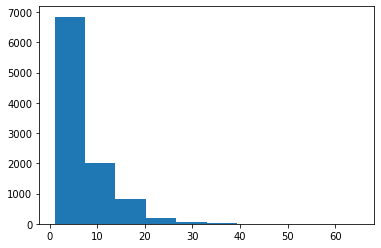

In [14]:
import matplotlib.pyplot as plt

plt.hist(list1)

The distribution is not normal!  Seems like it is mostly just a few rolls.  I wonder what the expected or average value is.

In [49]:
list2 = []
for j in range(1000):
  list1 = []
  for i in range(1000):
    list1.append(PlayCraps())
  list2.append(sum(list1)/len(list1))

(array([  5.,  31., 106., 200., 251., 233., 121.,  34.,  16.,   3.]),
 array([6.064, 6.191, 6.318, 6.445, 6.572, 6.699, 6.826, 6.953, 7.08 ,
        7.207, 7.334]),
 <a list of 10 Patch objects>)

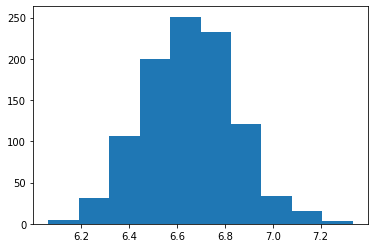

In [50]:
plt.hist(list2)

In [51]:
from numpy import mean

mean(list2)

6.650587

As I perused the internet for this value, I found lots of answers that were larger!  How can that be!  At first I thought I had the program wrong.  Below I write some code to check the craps game by hand.

In [18]:
def ErrorTestingPlayCraps():
  listOfRolls = []
  randRoll = Roll2Dice()
  listOfRolls.append(randRoll)
  x = ComeOutRoll(randRoll)
  rollCounter = 1
  PassLineWins = 0
  while (x != 'Craps')&(x != 'SevenOut'):
    if x == 'comeAgain':
      listOfRolls.append('Pass Line Win')
      PassLineWins += 1
      rollCounter += 1
      randRoll = Roll2Dice()
      listOfRolls.append(randRoll)
      x = ComeOutRoll(randRoll)
    else:
      point = x
      rollCounter += 1
      randRoll = Roll2Dice()
      listOfRolls.append(randRoll)
      listOfRolls.append(point)
      x = SetPointRoll(randRoll,point)
  else:
    listOfRolls.append(x)
  return rollCounter, listOfRolls

In [48]:
ErrorTestingPlayCraps()

(6,
 [[3, 4],
  'Pass Line Win',
  [1, 3],
  [6, 6],
  4,
  [3, 2],
  4,
  [6, 5],
  4,
  [1, 6],
  4,
  'SevenOut'])

In [20]:
ErrorTestingPlayCraps()

(4, [[6, 2], [4, 5], 8, [5, 5], 8, [3, 4], 8, 'SevenOut'])

This simulation is more fun as it really shows you what happens on each roll.


Trying this ***many*** times, I did not see an error.  This makes me feel like the reference [here](https://wizardofodds.com/ask-the-wizard/craps/probability/) has an error in their computation.  Let's see if we can find the value theoretically we have simulated!

Here is the theoretical expected value.  Call the expected value $x$.  Then on the **ComeOutRoll**, craps results in the end of the game, natural results in playing the game again plus the roll you made and setting the point will result in a small game.

Each point will have a different expected value.  The point at 4 or 10 will result in an expected value of 4 (point rolls end with 4 or 7 $p = \frac{9}{36}$)  The game continues the probability of $\frac39$.  All the rest are similar.  This creates an expected value computation of

$$
x
=
\frac4{36}
+
\frac8{36}(x+1)
+
2\cdot \frac3{36}\left(4+1+\frac39x\right)
+
2\cdot \frac4{36}\left(3.6+1+\frac4{10}x\right)
+
2\cdot \frac5{36}\left(\frac{36}{11}+1+\frac5{11}x\right)
$$

In [7]:
import sympy

x = sympy.Symbol('x')
sympy.solve(4/36+8/38*(x+1)+2*3/36*(5+3/9*x)+8/36*(4.6+4/10*x)+10/36*(36/11+1+5/11*x)-x,x)

[6.48473047755688]